## Setup

In [1]:
import os

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="ticks", color_codes=True)

In [2]:
# let's see what we've got
print(os.listdir("../data/raw"))

['application_test.csv', '.DS_Store', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv']


## Exploratory Data Analysis

In [3]:
appTrainDf = pd.read_csv("../data/raw/application_train.csv")
print('Training data shape: ', appTrainDf.shape)

Training data shape:  (307511, 122)


In [4]:
for col in appTrainDf.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [5]:
profile = pandas_profiling.ProfileReport(appTrainDf)

In [6]:
profile

Number of variables,122
Number of observations,307511
Total Missing (%),9.6%
Total size in memory,286.2 MiB
Average record size in memory,976.0 B
Numeric,72
Categorical,16
Date,0
Text (Unique),0
Rejected,34
Distinct count,13673


In [7]:
appTrainDf['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

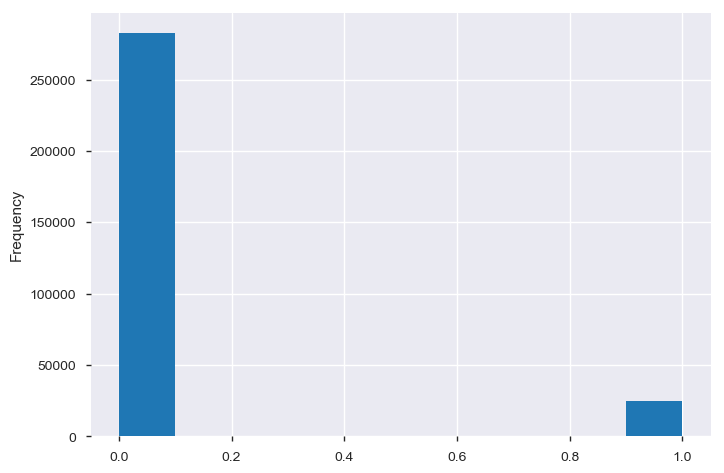

In [8]:
appTrainDf['TARGET'].astype(int).plot.hist()

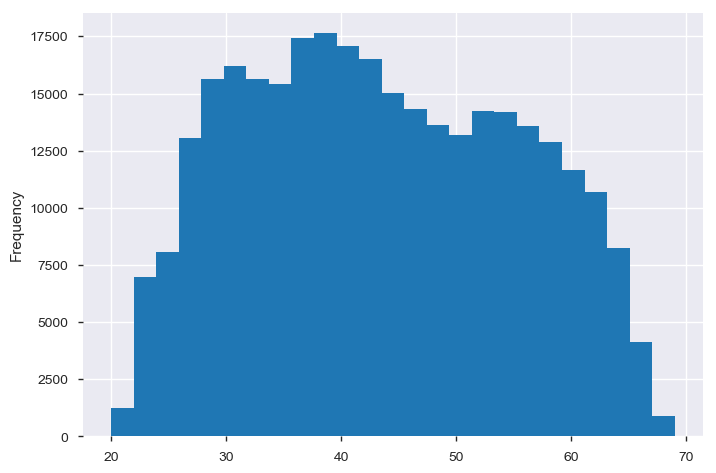

In [9]:
(appTrainDf['DAYS_BIRTH'] / -365).astype(int).plot.hist(bins = 25)

### Distributions

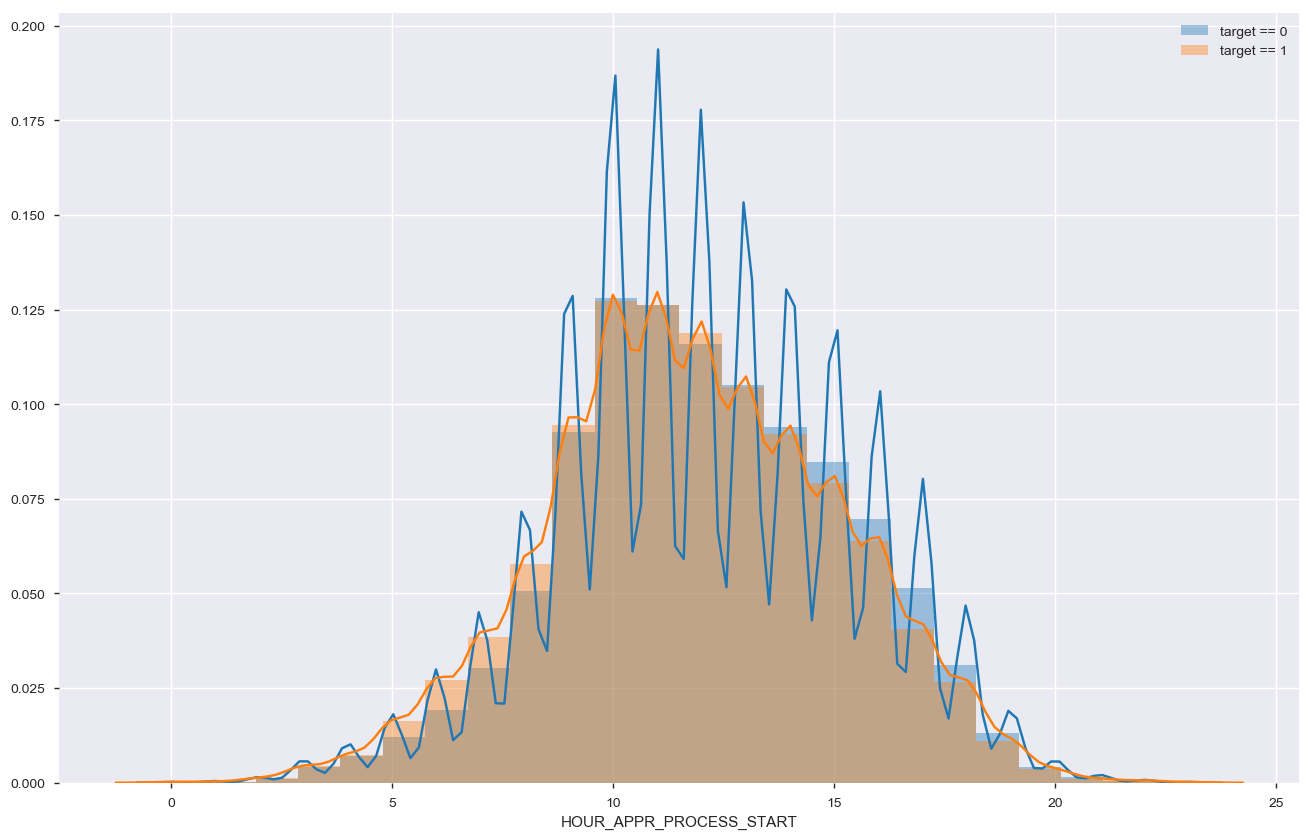

In [10]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'HOUR_APPR_PROCESS_START'], label = 'target == 0', bins=24)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'HOUR_APPR_PROCESS_START'], label = 'target == 1', bins=24)

plt.legend()

It looks like people who apply in the mornings have more trouble than those later in the day.

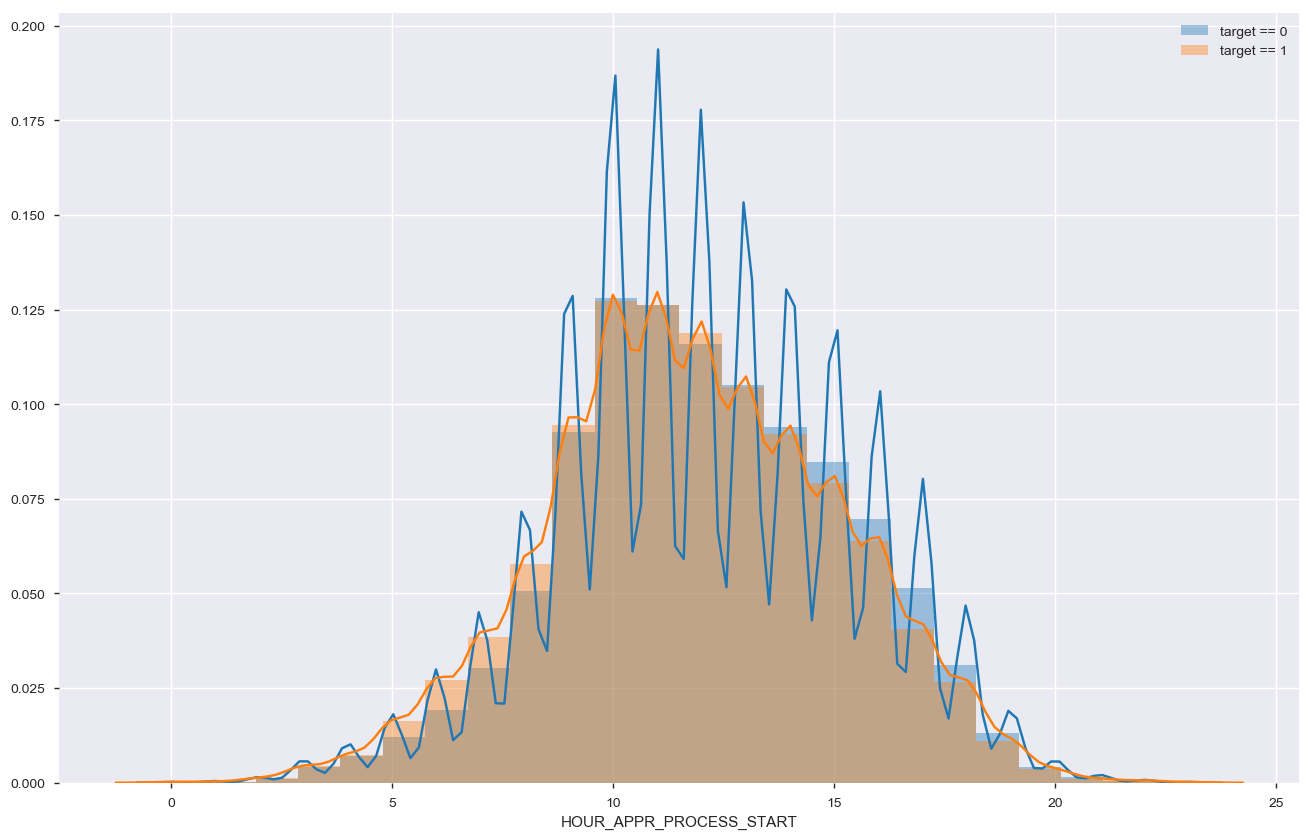

In [11]:
plt.figure(figsize = (16, 10))

sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 0, 'HOUR_APPR_PROCESS_START'], label = 'target == 0', bins=24)
sns.distplot(appTrainDf.loc[appTrainDf['TARGET'] == 1, 'HOUR_APPR_PROCESS_START'], label = 'target == 1', bins=24)

plt.legend()

## Making a Model

In [12]:
from sklearn.tree import DecisionTreeRegressor


y = appTrainDf.TARGET

predictors = ['HOUR_APPR_PROCESS_START', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
              'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
             'NAME_HOUSING_TYPE, ']

X = appTrainDf[predictors]

model = DecisionTreeRegressor()
model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

ModuleNotFoundError: No module named 'sklearn'